## Introduction

In this notebook we do a basic EDA on our image data exported with a launch file in ROS.

In [11]:
# Import Python Image Library
import os
import numpy as np
from PIL import Image
import matplotlib as plt

Let's load one of the track images under default settings. If the image can't be read due to problems like missing file, unsupported format, etc, than this method will return an empty matrix. We will load the image with the default camera configuration within Intel Realsense D455 camera's rgb_camera node.

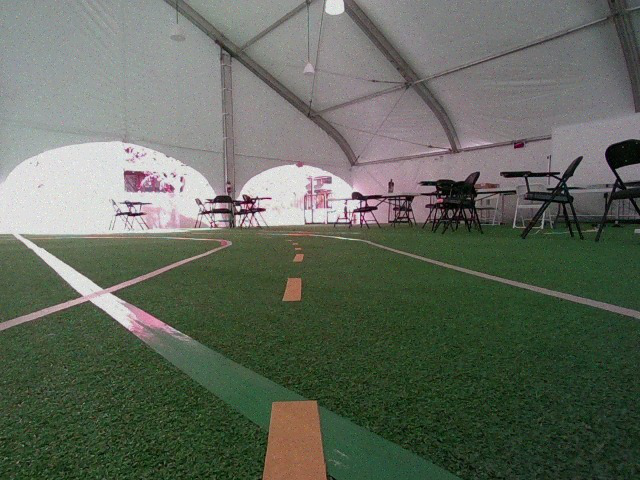

In [22]:
default_img = Image.open('../test/testdata/single_image/default_track.jpg')
default_img

Get dimensions of this image.(row (height), column(width), color(3))

In [23]:
# 3D ndarray
np.shape(default_img)

(480, 640, 3)

Calculate the mean and median, standard deviation of the image pixels.

In [24]:
print('Mean: ' + str(np.mean(default_img)))
print('Median: ' + str(np.median(default_img))) 
print('Standard Deviation: ' + str(np.std(default_img)))

Mean: 97.92249891493056
Median: 85.0
Standard Deviation: 55.266220177945584


Now let's load the image with default settings under bright conditions.

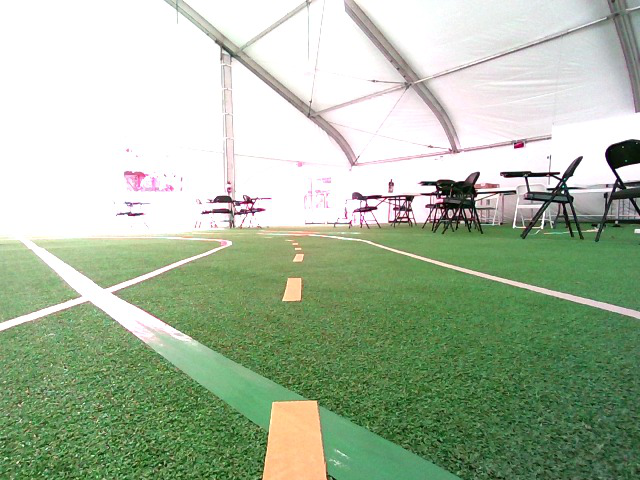

In [25]:
default_bright_img = Image.open('../test/testdata/single_image/default_track_light.jpg')
default_bright_img

Get dimensions of this image.(row (height), column(width), color(3))

In [26]:
# 3D ndarray
np.shape(default_img)

(480, 640, 3)

Again, calculate the mean and median, standard deviation of the image pixels.

In [27]:
print('Mean: ' + str(np.mean(default_bright_img)))
print('Median: ' + str(np.median(default_bright_img))) 
print('Standard Deviation: ' + str(np.std(default_bright_img)))

Mean: 170.84384114583332
Median: 166.0
Standard Deviation: 75.906336671437


Next, we have a lot of images (approximately 66) under our track lap dataset, since we need all exported image data of the whole track lap to evaluate runtime performance of the car with different camera configurations properly.

It is further useful to generate one single average picture from these sets of images because it gives us an idea of average pixel intensities within one merged picture. This connects to the work we are doing with runtime performance later, since we can use this merged picture as a reference to judge the overall luminescence of the image.

We need to access all .jpg files in the directory.

In [28]:
path = '../test/testdata/track_laps/default_lap/'
allfiles = os.listdir(path)
img_lst = [path + file for file in allfiles if file[-4:] in ['.jpg']]

Given that all images are the same size, get the dimensions of the first image.

In [29]:
width, height = Image.open(img_lst[0]).size
N = len(img_lst)

Create an array of floats to store the average.

In [30]:
arr = np.zeros((height, width, 3), np.float)

Calculate average pixel intensities, casting each image as an array of floats.

In [31]:
for i in img_lst:
    img_arr = np.array(Image.open(i), dtype=np.float)
    arr = arr+img_arr/N

Round values in an array and cast as 8-bit integer.

In [32]:
arr = np.array(np.round(arr), dtype=np.uint8)

Generate the final merged image.

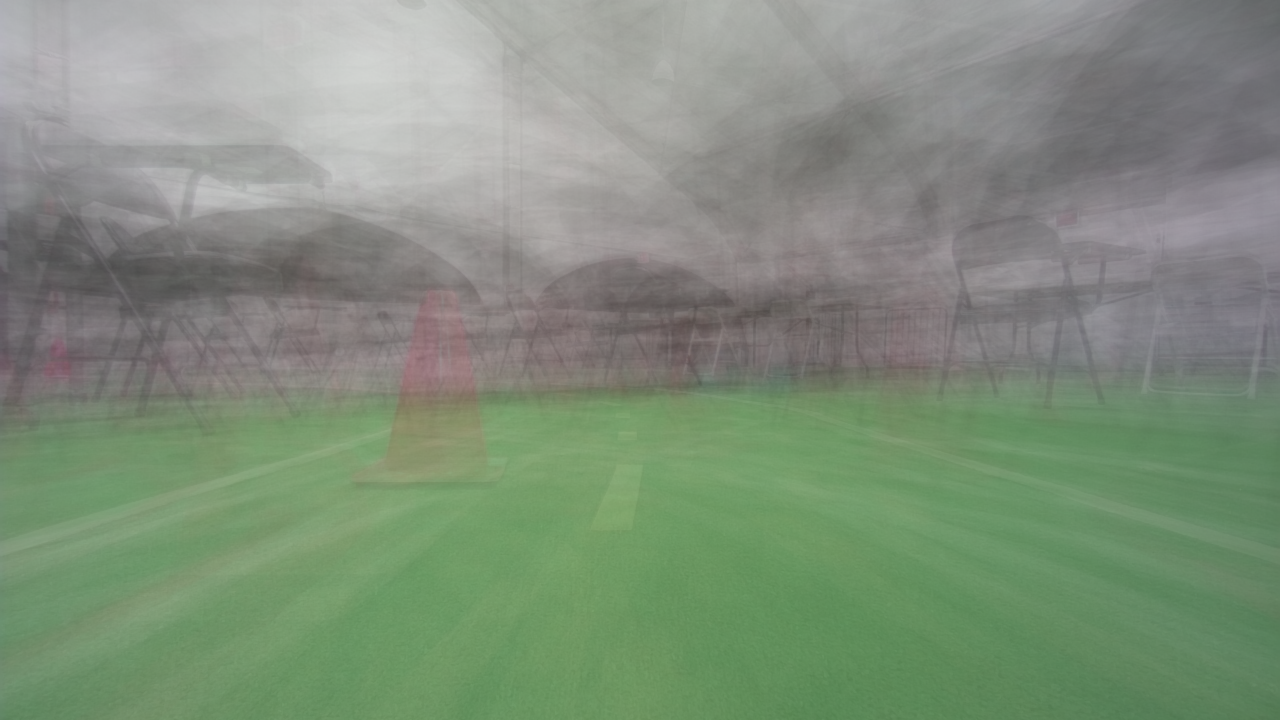

In [33]:
merged = Image.fromarray(arr, mode="RGB")
merged